## Observations and Insights 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results, on="Mouse ID") 

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
# Checking the number of mice.
mice_number=combined_df["Mouse ID"].value_counts()
mice_number= len(mice_number)
print(f"The total number of mice is {mice_number}.")

The total number of mice is 249.


In [61]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df=combined_df[combined_df.duplicated(["Mouse ID","Timepoint"])]
duplicated_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [62]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data= combined_df.loc[combined_df["Mouse ID"]=="g989",:]
duplicated_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_clean_df=combined_df.loc[combined_df["Mouse ID"]!="g989",:]
mice_clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [64]:
# Checking the number of mice in the clean DataFrame.
mice_clean_number=len(mice_clean_df["Mouse ID"].value_counts())
print(f"The total number of mice is {mice_clean_number}.")


The total number of mice is 248.


## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.



In [66]:
drug_regimen=mice_clean_df.groupby("Drug Regimen")
drug_regimen.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
692,c580,Ketapril,Male,22,25,10,47.570174,1
693,c580,Ketapril,Male,22,25,15,51.991708,1
694,c580,Ketapril,Male,22,25,20,55.575322,2
695,c580,Ketapril,Male,22,25,25,56.289062,2


In [106]:
mean_tumour= drug_regimen["Tumour Volume (mm3)"].mean()
median_tumour=drug_regimen["Tumour Volume (mm3)"].median()
variance_tumour= drug_regimen["Tumour Volume (mm3)"].var()
std_tumour=drug_regimen["Tumour Volume (mm3)"].std()
sem_tumour=drug_regimen["Tumour Volume (mm3)"].sem()
drug_regimen_df=pd.DataFrame({"Tumour Volumn Mean":mean_tumour,
                            "Tumour Volumn Median":median_tumour,
                            "Tumour Volumn Variance":variance_tumour,
                            "Tumour Volumn Standard Deviation":std_tumour,
                            "Tumour Volumn SEM":sem_tumour})
drug_regimen_df

,Tumour Volumn Mean,Tumour Volumn Median,Tumour Volumn Variance,Tumour Volumn Standard Deviation,Tumour Volumn SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen.agg({"Tumour Volume (mm3)":['mean','median','var','std','sem']})

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

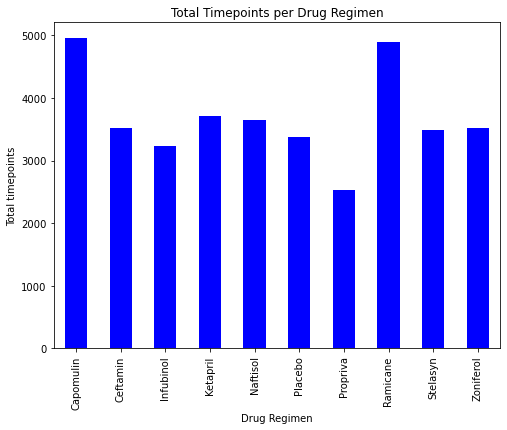

In [69]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint=drug_regimen["Timepoint"].sum()
figure1=timepoint.plot(kind="bar",facecolor='b',figsize=(8,6),
                       title="Total Timepoints per Drug Regimen",
                       xlabel="Drug Regimen",ylabel="Total timepoints")
plt.show()


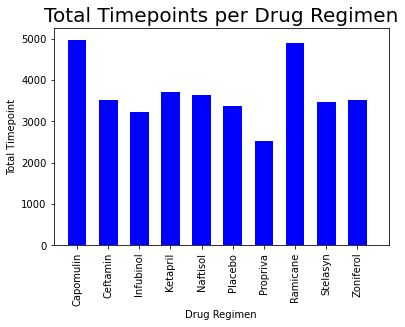

In [91]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints_total=drug_regimen["Timepoint"].sum()
axis_drug=np.arange(len(drug_regimen["Drug Regimen"]))
#print(axis_drug)
#fig1, ax1 = plt.subplots(figsize = (8, 6))
plt.bar(axis_drug,timepoints_total,color='b',align="center", width= 0.6)
tick_list=drug_regimen_df.index.values.tolist()
tick_locations=[value for value in axis_drug]
plt.xticks(tick_locations,tick_list, rotation='vertical')
plt.xlim(-0.75, len(axis_drug))
plt.ylim(0, max(timepoints_total)+300)

plt.title("Total Timepoints per Drug Regimen",fontsize=20)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoint")

plt.show()


        Mouse ID  Drug Regimen  Age_months  Weight (g)  Timepoint  \
Sex                                                                 
Female       922           922         922         922        922   
Male         958           958         958         958        958   

        Tumour Volume (mm3)  Metastatic Sites  
Sex                                            
Female                  922               922  
Male                    958               958  


Text(0, 0.5, 'Gender Summary')

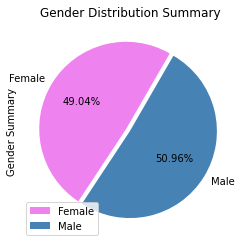

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df=mice_clean_df.groupby("Sex").count()
print(gender_df)
gender_color=['violet','steelblue']
gender_explode=(0.05,0)
gender_figure=gender_df.plot(kind="pie",y='Mouse ID',autopct='%0.2f%%',colors=gender_color,explode=gender_explode,startangle=60,title=("Gender Distribution Summary"))
gender_figure.set_ylabel("Gender Summary")





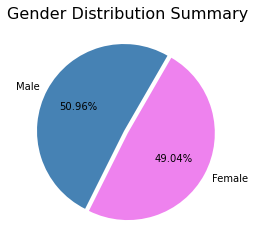

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count=mice_clean_df["Sex"].value_counts()
colour_plot=["steelblue","violet"]
explode_plot=(0.05,0)
plt.pie(gender_count,labels=['Male','Female'],autopct='%0.2f%%',colors=colour_plot,explode=explode_plot,startangle=60)
plt.title("Gender Distribution Summary",fontsize=16)
plt.show()

## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tumor_df=mice_clean_df.groupby(["Mouse ID",])["Timepoint"].max()
last_tumor_df.reset_index()

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
max_point_df=pd.merge(last_tumor_df,mice_clean_df,on=["Mouse ID","Timepoint"],how="left")
max_point_df.shape

(248, 8)

In [74]:
max_point_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [75]:

# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumour vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


treatment_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumour_volumn_data=[]

for drug in treatment_list:
    volumn_data=max_point_df.loc[max_point_df["Drug Regimen"]==drug,"Tumour Volume (mm3)"]
    tumour_volumn_data.append(volumn_data)
    #print(volumn_data)
    #lowerq = volumn_data.quantile([0.25])
    #upperq = volumn_data.quantile([0.75])
    upperq= np.quantile(volumn_data, 0.75)
    lowerq  = np.quantile(volumn_data, 0.25)
    #print(lowerq)
    #print(upperq)
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers=volumn_data.loc[(volumn_data<lower_bound)|(volumn_data>upper_bound)]
    print(f"The outlier for {drug} is below {round(lower_bound,2)}, and above {round(upper_bound,2)}.")

The outlier for Capomulin is below 20.7, and above 51.83.
The outlier for Ramicane is below 17.91, and above 54.31.
The outlier for Infubinol is below 36.83, and above 82.74.
The outlier for Ceftamin is below 25.36, and above 87.67.


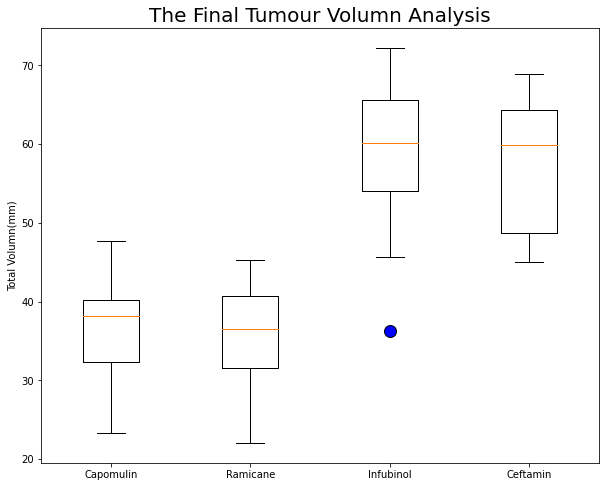

In [76]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='blue', markersize=12,
                  linestyle='none')

fig1, ax1 = plt.subplots(figsize = (10, 8))
ax1.set_title("The Final Tumour Volumn Analysis",fontsize=20)
ax1.set_ylabel("Total Volumn(mm)")
ax1.boxplot(tumour_volumn_data,labels=treatment_list, widths=0.4,flierprops=flierprops)
plt.show()


## Line and Scatter Plots

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumour Volume (mm3)  Metastatic Sites  
10            45.000000                 0  
11            43.878496                 0  
12            37.614948                 0  
13            38.177232                 0 

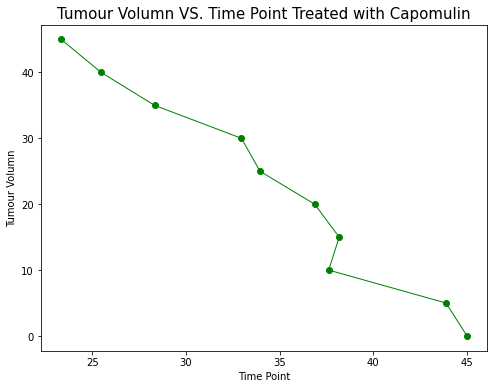

In [107]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
from turtle import color


capomulin_df= combined_df.loc[combined_df["Drug Regimen"]=="Capomulin",:]
#print(capomulin_df)
#select Mouse ID S185
capomulin_s185=capomulin_df.loc[capomulin_df["Mouse ID"]=="s185",:]
print(capomulin_s185)

axis_capomulin=capomulin_s185["Tumour Volume (mm3)"]
timepoint_capomulin=capomulin_s185["Timepoint"]
fig, ax = plt.subplots(figsize = (8, 6))
plt.plot(axis_capomulin,timepoint_capomulin,marker='o',color='green',linewidth=1)
plt.title("Tumour Volumn VS. Time Point Treated with Capomulin",fontsize=15)
plt.xlabel('Time Point')
plt.ylabel('Tumour Volumn')
plt.show()




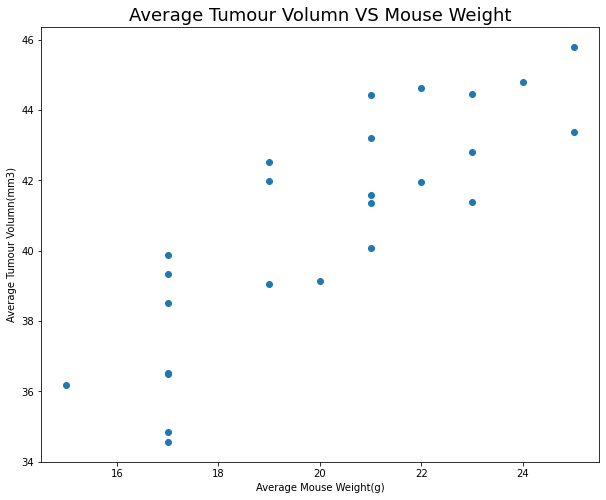

In [78]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
ave_capomulin_df=capomulin_df.groupby("Mouse ID").mean()
ave_capomulin_df
tumour_ave=ave_capomulin_df["Tumour Volume (mm3)"]

weight_ave=ave_capomulin_df["Weight (g)"]
fig, ax = plt.subplots(figsize = (10, 8))
plt.title("Average Tumour Volumn VS Mouse Weight",fontsize=18)
plt.xlabel("Average Mouse Weight(g)")
plt.ylabel("Average Tumour Volumn(mm3)")

plt.scatter(weight_ave,tumour_ave)
plt.show()





## Correlation and Regression

In [79]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
corr=round(st.pearsonr(tumour_ave,weight_ave)[0],3)
print(f"The correlation between average mouse weight and the average tumour volume is {corr}")


The correlation between average mouse and the average tumour volume is 0.842


y = 0.95x + 21.55
The r-squared is: 0.7089


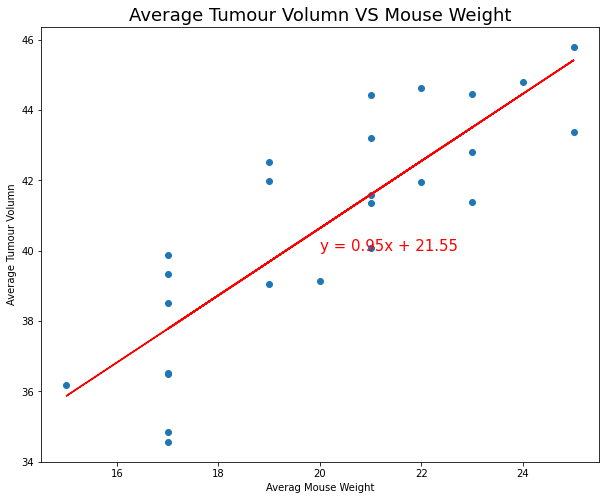

In [104]:
# Add the linear regression equation and line to plot
fig, ax = plt.subplots(figsize = (10, 8))

x_value=weight_ave
y_value=tumour_ave
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
#plt.figure(figsize=(10,8))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")

plt.title("Average Tumour Volumn VS Mouse Weight",fontsize=18)
plt.xlabel("Average Mouse Weight")
plt.ylabel("Average Tumour Volumn")
print(f"The r-squared is: {round(rvalue**2,4)}")
plt.show()

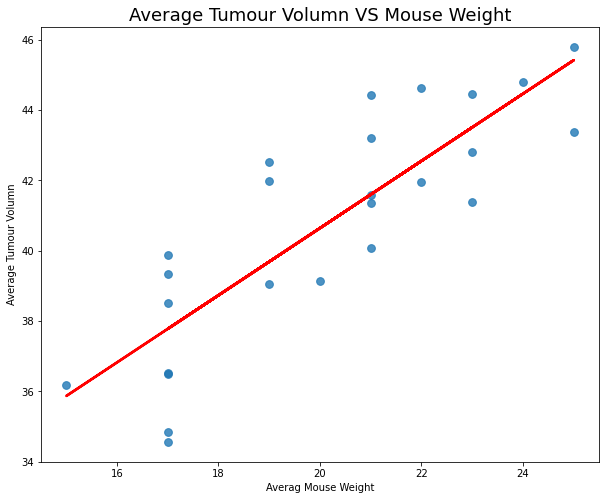

In [85]:
fig, ax = plt.subplots(figsize = (10, 8))
x=weight_ave
y=tumour_ave
# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.8)
plt.title("Average Tumour Volumn VS Mouse Weight",fontsize=18)
plt.xlabel("Averag Mouse Weight")
plt.ylabel("Average Tumour Volumn")

b, a = np.polyfit(x, y, deg=1)



# Plot regression line
ax.plot(x, a + b * x, color="r", lw=2.5)